In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import numpy as np

In [3]:
raw_data = np.genfromtxt("/content/drive/MyDrive/제로베이스/스터디노트/18주차/x09.txt", skip_header=36)
raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

In [ ]:
!pip install koreanize_matplotlib

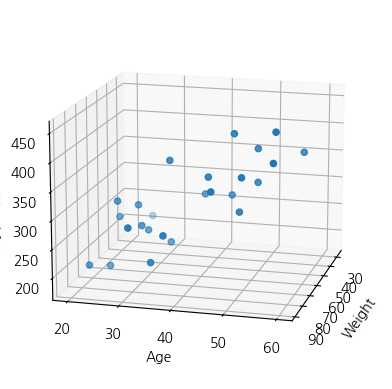

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import koreanize_matplotlib
%matplotlib inline

xs = np.array(raw_data[:, 2], dtype=np.float32)
ys = np.array(raw_data[:, 3], dtype=np.float32)
zs = np.array(raw_data[:, 4], dtype=np.float32)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(xs, ys, zs)
ax.set_xlabel("Weight")
ax.set_ylabel("Age")
ax.set_zlabel("Blood fat")
ax.view_init(15, 15)

plt.show()

In [7]:
# 학습 대상 데이터를 추리다
x_data = np.array(raw_data[:, 2:4], dtype=np.float32)
y_data = np.array(raw_data[:, 4], dtype=np.float32)

In [8]:
y_data

array([354., 190., 405., 263., 451., 302., 288., 385., 402., 365., 209.,
       290., 346., 254., 395., 434., 220., 374., 308., 220., 311., 181.,
       274., 303., 244.], dtype=float32)

In [9]:
y_data = y_data.reshape((25, 1))

In [11]:
y_data

array([[354.],
       [190.],
       [405.],
       [263.],
       [451.],
       [302.],
       [288.],
       [385.],
       [402.],
       [365.],
       [209.],
       [290.],
       [346.],
       [254.],
       [395.],
       [434.],
       [220.],
       [374.],
       [308.],
       [220.],
       [311.],
       [181.],
       [274.],
       [303.],
       [244.]], dtype=float32)

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2, ))
])


model.compile(optimizer="rmsprop", loss="mse")

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
hist = model.fit(x_data, y_data, epochs=4000)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 11ms/step - loss: 18250.4746
Epoch 1502/4000
1/1 [==============================] - 0s 5ms/step - loss: 18224.0547
Epoch 1503/4000
1/1 [==============================] - 0s 6ms/step - loss: 18197.6621
Epoch 1504/4000
1/1 [==============================] - 0s 11ms/step - loss: 18171.2930
Epoch 1505/4000
1/1 [==============================] - 0s 6ms/step - loss: 18144.9453
Epoch 1506/4000
1/1 [==============================] - 0s 10ms/step - loss: 18118.6230
Epoch 1507/4000
1/1 [==============================] - 0s 6ms/step - loss: 18092.3281
Epoch 1508/4000
1/1 [==============================] - 0s 8ms/step - loss: 18066.0566
Epoch 1509/4000
1/1 [==============================] - 0s 11ms/step - loss: 18039.8145
Epoch 1510/4000
1/1 [==============================] - 0s 5ms/step - loss: 18013.5918
Epoch 1511/4000
1/1 [==============================] - 0s 10ms/step - loss: 17987.3965
Epoch 1512/4000
1/1 [========

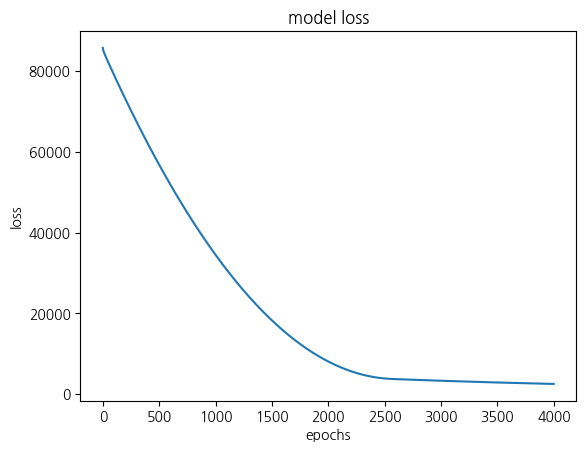

In [15]:
# loss가 잘 떨어진다.
plt.plot(hist.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

In [16]:
# 100kg 44살의 blood fat 예측
model.predict(np.array([100, 44]).reshape(1, 2))

1/1 [==============================] - 0s 106ms/step


array([[399.69662]], dtype=float32)

In [17]:
# 60kg 25살의 blood fat 예측
model.predict(np.array([60, 25]).reshape(1, 2))

1/1 [==============================] - 0s 47ms/step


array([[236.47652]], dtype=float32)

In [18]:
# 가중치와 bias를 알고 싶다면?
W_, b_ = model.get_weights()
print("Weight is : ", W_)
print("bias is : ", b_)

Weight is :  [[2.4081552]
 [3.5207314]]
bias is :  [3.9689107]


In [19]:
# 모델이 잘 만들어졌는지 확인하기 위해 데이터를 만들고
x = np.linspace(20, 100, 50).reshape(50, 1)
y = np.linspace(10, 70, 50).reshape(50, 1)

X = np.concatenate((x, y), axis=1)
Z = np.matmul(X, W_) + b_

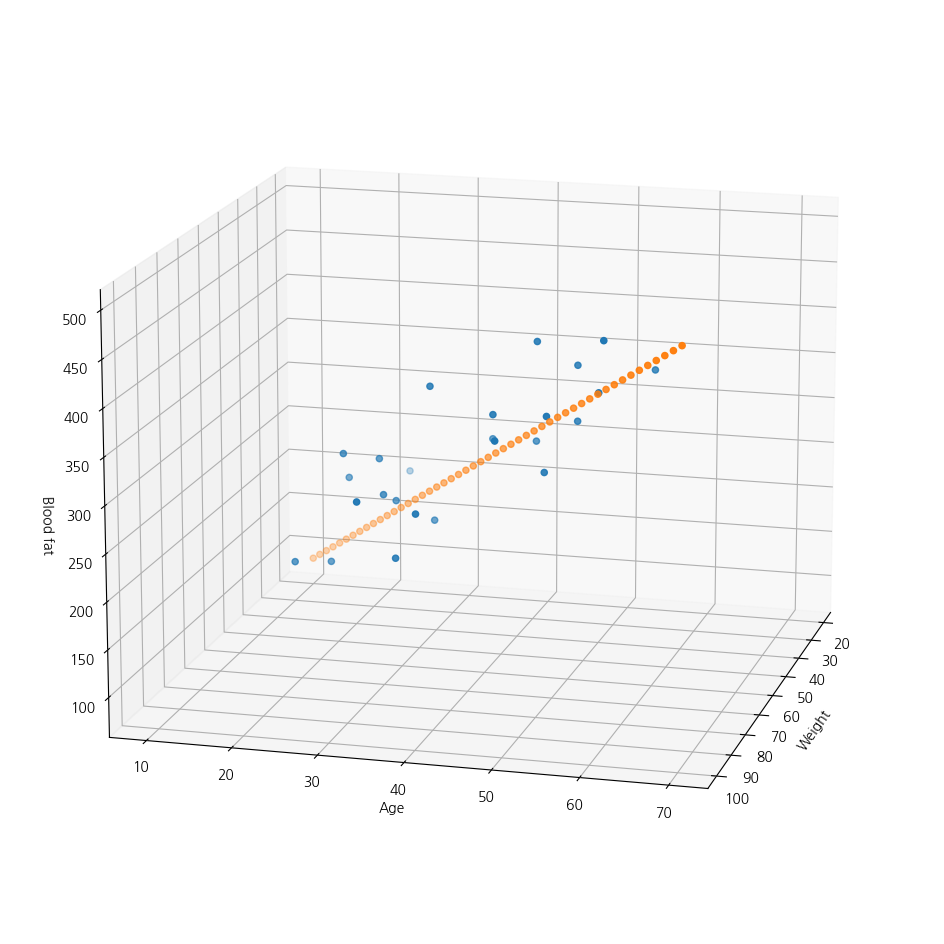

In [20]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(xs, ys, zs)
ax.scatter(x, y, Z)
ax.set_xlabel("Weight")
ax.set_ylabel("Age")
ax.set_zlabel("Blood fat")
ax.view_init(15, 15)

plt.show()

# XOR

In [21]:
X = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1]
])

y = np.array([[0], [1], [1], [0]])

In [22]:
import tensorflow as tf

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, activation="sigmoid", input_shape=(2,)),
    tf.keras.layers.Dense(1, activation="sigmoid", )
])

In [24]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss="mse")

In [25]:
hist = model.fit(X, y, epochs=4000, batch_size=1)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4/4 [==============================] - 0s 3ms/step - loss: 0.2502
Epoch 1502/4000
4/4 [==============================] - 0s 3ms/step - loss: 0.2502
Epoch 1503/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.2502
Epoch 1504/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.2502
Epoch 1505/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.2502
Epoch 1506/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.2502
Epoch 1507/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.2502
Epoch 1508/4000
4/4 [==============================] - 0s 3ms/step - loss: 0.2502
Epoch 1509/4000
4/4 [==============================] - 0s 3ms/step - loss: 0.2502
Epoch 1510/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.2502
Epoch 1511/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.2502
Epoch 1512/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.2

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.predict(X)

1/1 [==============================] - 0s 105ms/step


array([[0.5098973 ],
       [0.5419357 ],
       [0.45787463],
       [0.47951263]], dtype=float32)

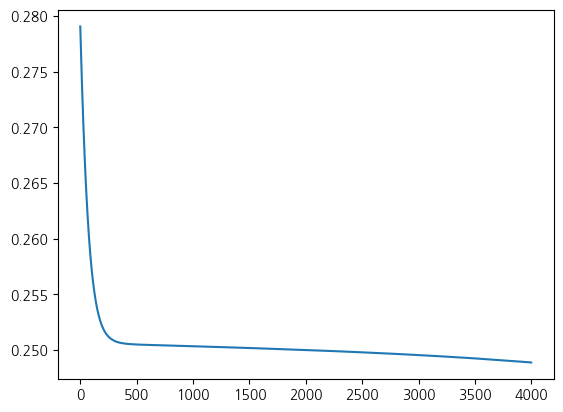

In [28]:
plt.plot(hist.history["loss"])

In [29]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

In [30]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False, handle_unknown="ignore")
enc.fit(y.reshape(len(y), 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [31]:
enc.categories_

[array([0, 1, 2])]

In [ ]:
y_onehot = enc.transform(y.reshape(len(y), 1))
y_onehot

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot,
                                                    test_size=0.2,
                                                    random_state=13)

In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(4, ), activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax"),
])

In [37]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2371 (9.26 KB)
Trainable params: 2371 (9.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 1.0651 - accuracy: 0.3083
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9988 - accuracy: 0.3083
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9423 - accuracy: 0.4417
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9048 - accuracy: 0.6083
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8675 - accuracy: 0.6500
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8346 - accuracy: 0.6667
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8028 - accuracy: 0.6833
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7739 - accuracy: 0.6667
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7471 - accuracy: 0.6833
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7213 - accuracy: 0.7750
Epoch 11/100
4/4 [===========

In [39]:
# test 데이터에 대한 accuracy
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0862 - accuracy: 0.9667 - 174ms/epoch - 174ms/step


[0.08622976392507553, 0.9666666388511658]

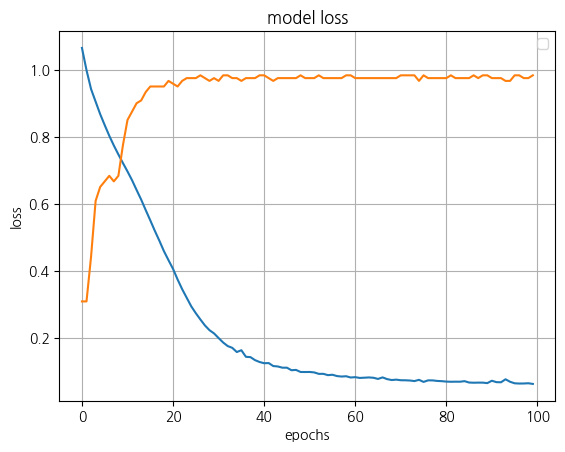

In [40]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["accuracy"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epochs")

plt.legend()
plt.grid()
plt.show()

# 📍 MNIST 데이터

In [3]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_Train, X_test = X_train/255.0, X_test/255 # 픽셀이 255라서

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train[0]

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795010 (3.03 MB)
Trainable params: 795010 (3.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# 학습
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100, verbose=1)

Epoch 1/10
600/600 [==============================] - 19s 31ms/step - loss: 0.1759 - accuracy: 0.9781 - val_loss: 2.0099 - val_accuracy: 0.2615
Epoch 2/10
600/600 [==============================] - 11s 18ms/step - loss: 0.1668 - accuracy: 0.9793 - val_loss: 2.0151 - val_accuracy: 0.2460
Epoch 3/10
600/600 [==============================] - 10s 17ms/step - loss: 0.1929 - accuracy: 0.9779 - val_loss: 1.9671 - val_accuracy: 0.2721
Epoch 4/10
600/600 [==============================] - 12s 20ms/step - loss: 0.1497 - accuracy: 0.9814 - val_loss: 1.9992 - val_accuracy: 0.2120
Epoch 5/10
600/600 [==============================] - 11s 19ms/step - loss: 0.1427 - accuracy: 0.9824 - val_loss: 1.9600 - val_accuracy: 0.2238
Epoch 6/10
600/600 [==============================] - 12s 19ms/step - loss: 0.1534 - accuracy: 0.9821 - val_loss: 1.9444 - val_accuracy: 0.2199
Epoch 7/10
600/600 [==============================] - 10s 17ms/step - loss: 0.1486 - accuracy: 0.9839 - val_loss: 1.9358 - val_accuracy:

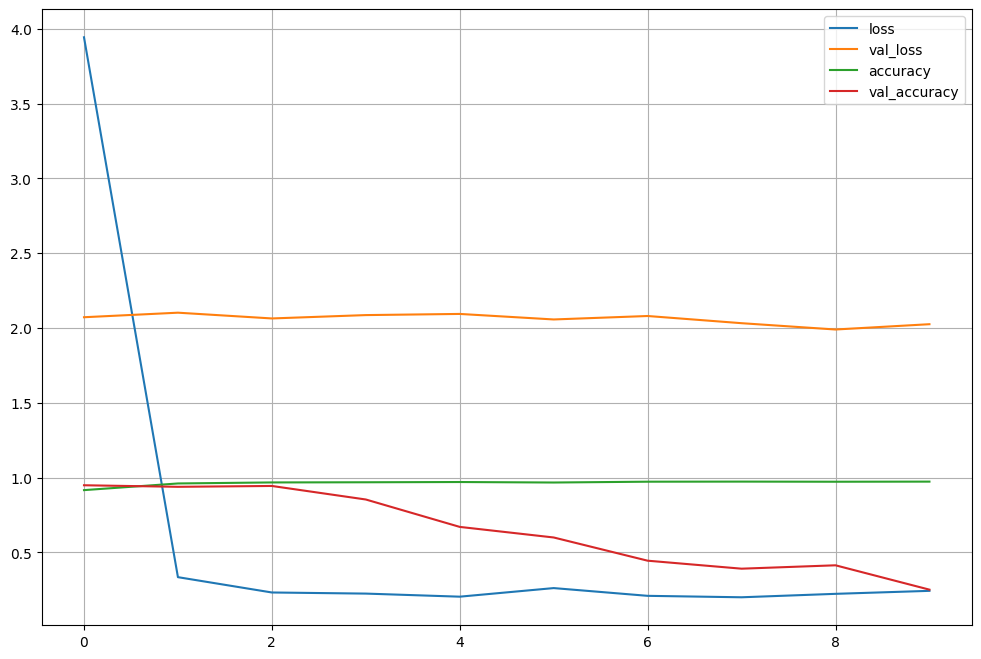

In [7]:
# acc와 loss를 그려보자
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ["loss", "val_loss", "accuracy", "val_accuracy"]

plt.figure(figsize=(12, 8))

for each in plot_target:
  plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [9]:
score = model.evaluate(X_test, y_test)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

313/313 [==============================] - 2s 6ms/step - loss: 1.8927 - accuracy: 0.2363
Test loss:  1.8926990032196045
Test accuracy:  0.2363000065088272


In [10]:
# 뭐가 틀렸나 확인
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 1s 4ms/step


array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8])

In [11]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [12]:
# 틀린 데이터의 인덱스만 모으기
wrong_result = []

for n in range(0, len(y_test)):
  if predicted_labels[n] != y_test[n]:
    wrong_result.append(n)

len(wrong_result)

7637

In [13]:
# 그중 16개 추출
import random

sample = random.choices(population=wrong_result, k=16)
sample

NameError: ignored

In [ ]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
  plt.subplot(4, 4, idx+1)
  plt.imshow(X_test[n].reshape(28, 28), cmap="Greys", interpolation="nearest")
  plt.title("Label: ", + str(y_test[n]) + "Predict: " + str(predicted_labels[n]))
  plt.axis("off")

plt.show()

# 📎 MNIST Fashion

In [8]:
pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 26.9 MB/s eta 0:00:00


In [4]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [10]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
import koreanize_matplotlib

samples = random.choices(population=range(0, len(y_train)), k=16)

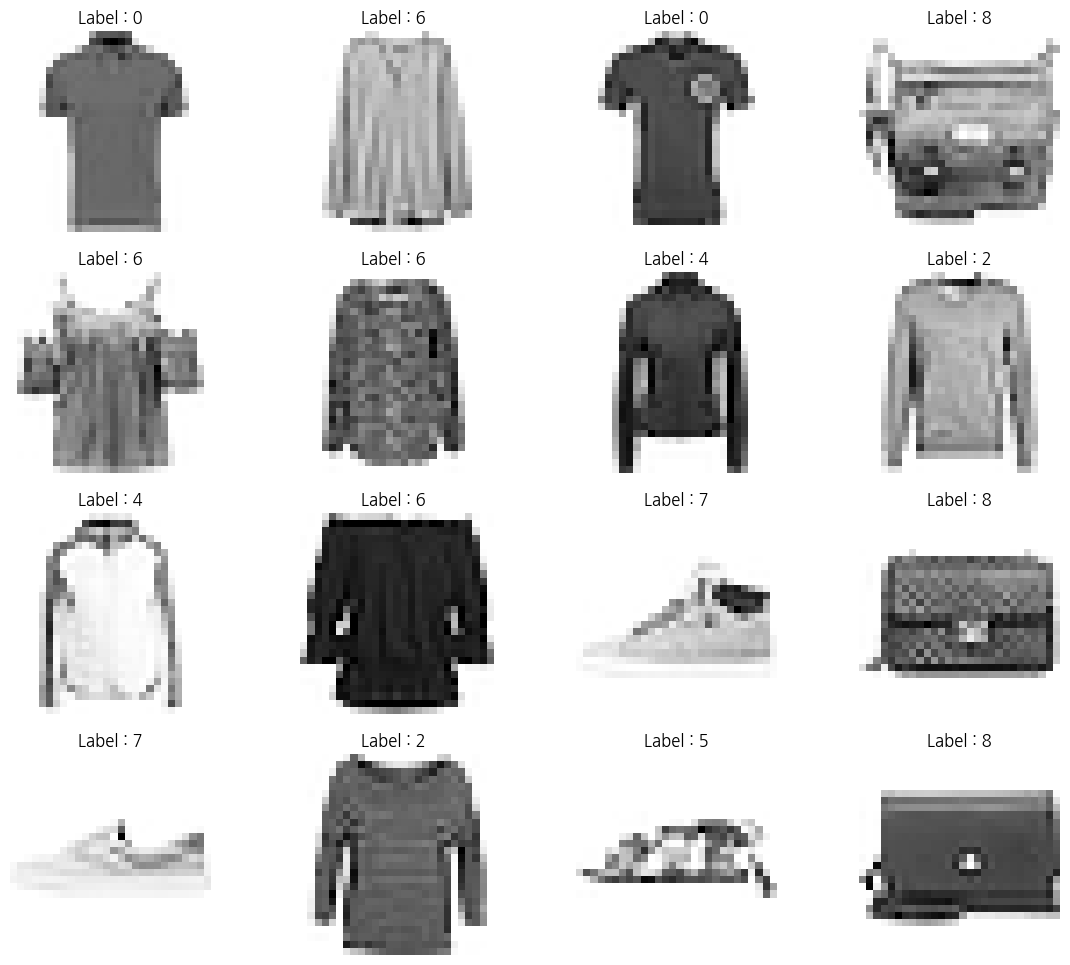

In [13]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
  plt.subplot(4, 4, idx+1)
  plt.imshow(X_train[n].reshape(28, 28), cmap="Greys", interpolation="nearest")
  plt.title("Label : " + str(y_train[n]))
  plt.axis("off")

plt.show()

In [14]:
# 모델 정의
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795010 (3.03 MB)
Trainable params: 795010 (3.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100, verbose=1)

Epoch 1/10
600/600 [==============================] - 16s 25ms/step - loss: 0.4879 - accuracy: 0.8285 - val_loss: 0.4385 - val_accuracy: 0.8351
Epoch 2/10
600/600 [==============================] - 14s 23ms/step - loss: 0.3592 - accuracy: 0.8693 - val_loss: 0.3751 - val_accuracy: 0.8665
Epoch 3/10
600/600 [==============================] - 19s 31ms/step - loss: 0.3216 - accuracy: 0.8827 - val_loss: 0.3529 - val_accuracy: 0.8740
Epoch 4/10
600/600 [==============================] - 18s 30ms/step - loss: 0.2991 - accuracy: 0.8896 - val_loss: 0.3759 - val_accuracy: 0.8596
Epoch 5/10
600/600 [==============================] - 19s 32ms/step - loss: 0.2781 - accuracy: 0.8964 - val_loss: 0.3730 - val_accuracy: 0.8665
Epoch 6/10
600/600 [==============================] - 19s 31ms/step - loss: 0.2639 - accuracy: 0.9013 - val_loss: 0.3415 - val_accuracy: 0.8811
Epoch 7/10
600/600 [==============================] - 19s 32ms/step - loss: 0.2532 - accuracy: 0.9043 - val_loss: 0.3284 - val_accuracy:

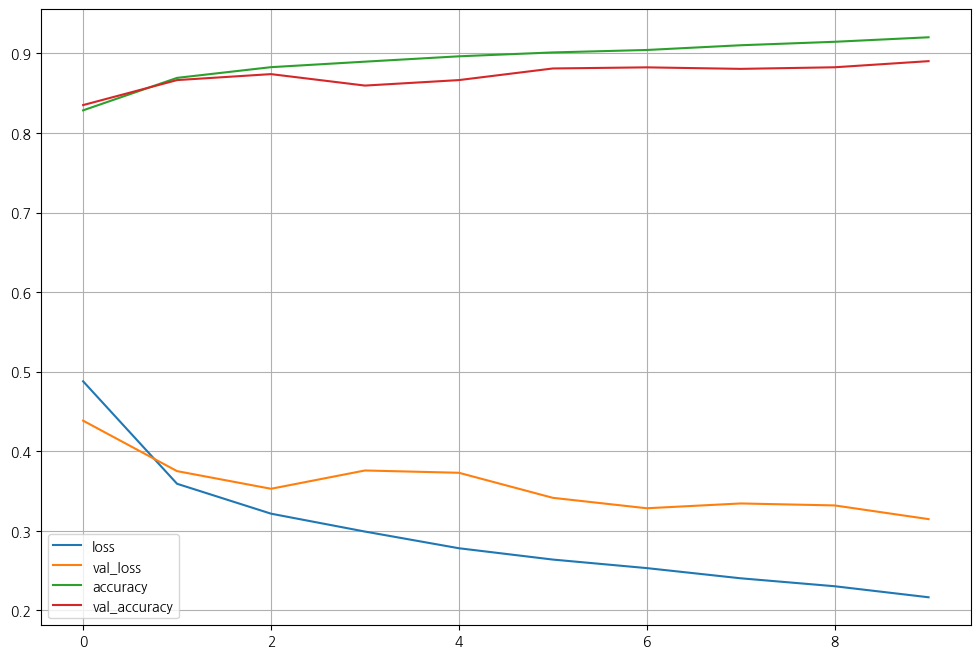

In [18]:
# 학습 상황을 관찰
plot_target = ["loss", "val_loss", "accuracy", "val_accuracy"]

plt.figure(figsize=(12, 8))

for each in plot_target:
  plt.plot(hist.history[each], label=each)


plt.legend()
plt.grid()
plt.show()

In [19]:
# 테스트데이터 accuracy
score = model.evaluate(X_test, y_test)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

313/313 [==============================] - 4s 12ms/step - loss: 0.3148 - accuracy: 0.8903
Test loss:  0.31475743651390076
Test accuracy:  0.8902999758720398


In [22]:
# 어떤 데이터가 틀렸는지 추출
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 3s 9ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [23]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

# 📍 CNN

In [5]:
from tensorflow.keras import datasets
from tensorflow.keras import layers, models

In [6]:
# 데이터 받기
mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
# 모델 구성

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                  padding="same", activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(64, (2, 2), activation="relu", padding="same"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [8]:
# 훈련
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

hist = model.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 226s 120ms/step - loss: 0.1150 - accuracy: 0.9637 - val_loss: 0.0346 - val_accuracy: 0.9884
Epoch 2/5
1875/1875 [==============================] - 154s 82ms/step - loss: 0.0456 - accuracy: 0.9858 - val_loss: 0.0308 - val_accuracy: 0.9902
Epoch 3/5
1875/1875 [==============================] - 141s 75ms/step - loss: 0.0322 - accuracy: 0.9897 - val_loss: 0.0342 - val_accuracy: 0.9882
Epoch 4/5
1875/1875 [==============================] - 139s 74ms/step - loss: 0.0265 - accuracy: 0.9919 - val_loss: 0.0275 - val_accuracy: 0.9917
Epoch 5/5
1875/1875 [==============================] - 140s 74ms/step - loss: 0.0190 - accuracy: 0.9940 - val_loss: 0.0266 - val_accuracy: 0.9922


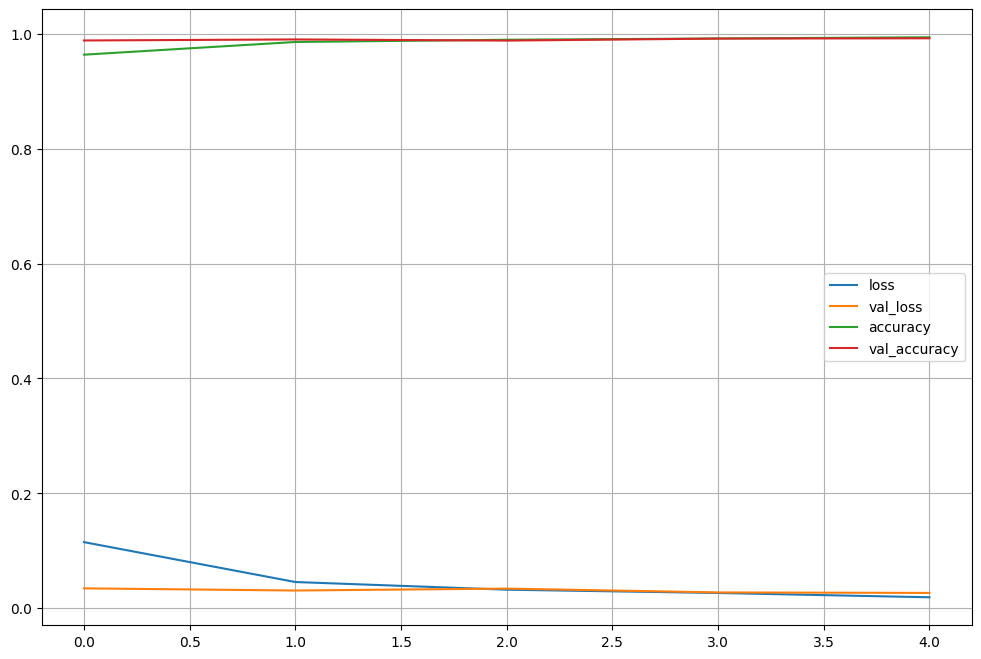

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ["loss", "val_loss", "accuracy", "val_accuracy"]
plt.figure(figsize=(12, 8))

for each in plot_target:
  plt.plot(hist.history[each], label=each)


plt.legend()
plt.grid()
plt.show()

In [10]:
# 정확도
score = model.evaluate(X_test, y_test)

print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

313/313 [==============================] - 6s 19ms/step - loss: 0.0266 - accuracy: 0.9922
Test loss:  0.02659042365849018
Test accuracy:  0.9922000169754028


In [11]:
# 모델 저장
model.save("MNIST_CNN_models.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 🔌 Fashion data

In [15]:
from tensorflow.keras import datasets

mnist = datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [17]:
hist = model.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 213s 114ms/step - loss: 0.3652 - accuracy: 0.8688 - val_loss: 0.2831 - val_accuracy: 0.8949
Epoch 2/5
1875/1875 [==============================] - 146s 78ms/step - loss: 0.2529 - accuracy: 0.9056 - val_loss: 0.2766 - val_accuracy: 0.9017
Epoch 3/5
1875/1875 [==============================] - 141s 75ms/step - loss: 0.2169 - accuracy: 0.9182 - val_loss: 0.2412 - val_accuracy: 0.9112
Epoch 4/5
1875/1875 [==============================] - 144s 77ms/step - loss: 0.1874 - accuracy: 0.9293 - val_loss: 0.2309 - val_accuracy: 0.9172
Epoch 5/5
1875/1875 [==============================] - 147s 78ms/step - loss: 0.1641 - accuracy: 0.9382 - val_loss: 0.2349 - val_accuracy: 0.9200


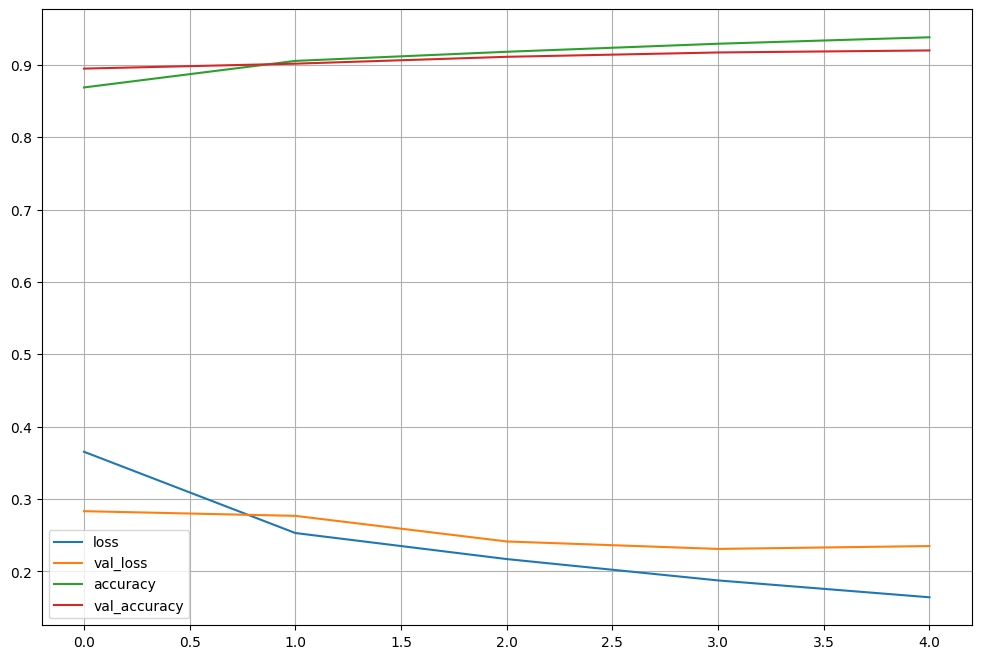

In [19]:
mnist_target = ["loss", "val_loss", "accuracy", "val_accuracy"]
plt.figure(figsize=(12, 8))

for each in mnist_target:
  plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [21]:
score = model.evaluate(X_test, y_test)

print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

313/313 [==============================] - 12s 37ms/step - loss: 0.2349 - accuracy: 0.9200
Test loss:  0.2348865419626236
Test accuracy:  0.9200000166893005
